In [4]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

# Predicting the sale prie of bulldozers using machine learning

Predicting the sale price of bulldozers.

## 1.Problem defination
> How well we predict the future sale price of a bulldozer, given ots characteristics and previous examples of how much similar bulldozers have been sold for?

## 2.Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3.Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4.Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets:
 https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [6]:
# Import training and validation dataset
df=pd.read_csv("data/TrainAndValid.csv",low_memory=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [8]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

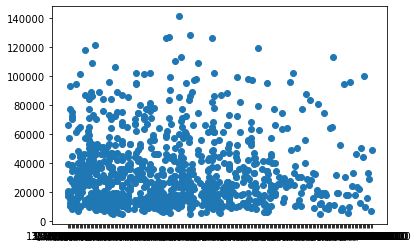

In [12]:
fig, ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])    

<AxesSubplot:ylabel='Frequency'>

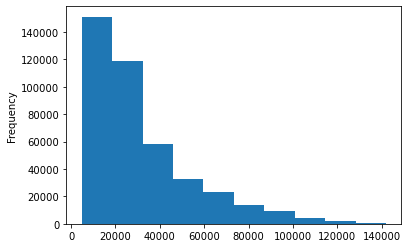

In [15]:
df["SalePrice"].plot.hist()

## Parsing date
when we work with time series data, we want to enrich the time and date component as much as possible.

We can do that be telling pandas which of our columns has dates in it using the `parse_dates` parameter

In [16]:
# import data again but this time we parse dates
df=pd.read_csv("data/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

In [18]:
df["saledate"].dtype

dtype('<M8[ns]')

In [19]:
df["saledate"][:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

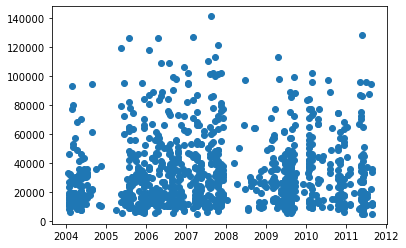

In [21]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [22]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [24]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### sort Dataframe by saledate
when working with time series data, it's a good idea to sort it by date


In [26]:
#sort DataFrame in date order
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate[:20]

205615   1989-01-17
233186   1989-01-31
142491   1989-01-31
115536   1989-01-31
92301    1989-01-31
115892   1989-01-31
134080   1989-01-31
92294    1989-01-31
31494    1989-01-31
140922   1989-01-31
66337    1989-01-31
92531    1989-01-31
82122    1989-01-31
92256    1989-01-31
145670   1989-01-31
92780    1989-01-31
238373   1989-01-31
127132   1989-01-31
115102   1989-01-31
32317    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [27]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
233186,1728883,30000.0,1523610,9105,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142491,1508502,21000.0,1153157,4138,132,99.0,1972,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Angle,None or Unspecified,NaN,NaN
115536,1452578,33000.0,1544443,3854,132,99.0,1974,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
92301,1403418,24000.0,1390168,7110,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# make a copy of the origianl Dataframe 
We make a copy of the original datframe so when we manipulate the copy,we still got our original data

In [28]:
# Make a copy
df_tmp=df.copy()

### Add datetime parameters for `saledate` column

In [29]:
df_tmp["saleyear"]=df_tmp["saledate"].dt.year

In [30]:
df_tmp["saleyear"][:20]

205615    1989
233186    1989
142491    1989
115536    1989
92301     1989
115892    1989
134080    1989
92294     1989
31494     1989
140922    1989
66337     1989
92531     1989
82122     1989
92256     1989
145670    1989
92780     1989
238373    1989
127132    1989
115102    1989
32317     1989
Name: saleyear, dtype: int64

In [31]:
df_tmp["saleMonth"]=df_tmp["saledate"].dt.month
df_tmp["saleDay"]=df_tmp["saledate"].dt.day
df_tmp["saleDayofweek"]=df_tmp["saledate"].dt.dayofweek
df_tmp["saleDayofyear"]=df_tmp["saledate"].dt.dayofyear


In [32]:
df_tmp.head().T

,205615,233186,142491,115536,92301
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500,30000,21000,33000,24000
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1986,1972,1974,1986
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [33]:
df_tmp.drop("saledate",inplace=True,axis=1)

In [35]:
df_tmp["saleyear"]

205615    1989
233186    1989
142491    1989
115536    1989
92301     1989
          ... 
409901    2012
405777    2012
411889    2012
411890    2012
409203    2012
Name: saleyear, Length: 412698, dtype: int64

<AxesSubplot:>

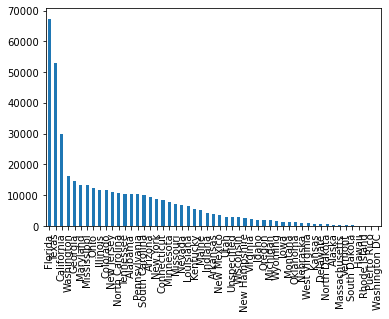

In [37]:
 df_tmp["state"].value_counts().plot(kind="bar")

## 5.Modelling

Now we do model driven EDA

In [39]:
#Lets build a machine learning model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(njobs=-1,
                           random_state=42)

TypeError: __init__() got an unexpected keyword argument 'njobs'

# we have got some nan value and not all data is in numerical form which we like and therfore we have to encode our data which is not numericals and fillup or drop data whic is not there

In [42]:
df_tmp[:20]

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,saleMonth,saleDay,saleDayofweek,saleDayofyear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
233186,1728883,30000.0,1523610,9105,132,99.0,1986,NaN,NaN,WA150,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
142491,1508502,21000.0,1153157,4138,132,99.0,1972,NaN,NaN,D7F,...,None or Unspecified,Angle,None or Unspecified,NaN,NaN,1989,1,31,1,31
115536,1452578,33000.0,1544443,3854,132,99.0,1974,NaN,NaN,966C,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
92301,1403418,24000.0,1390168,7110,132,99.0,1986,NaN,NaN,416,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
115892,1453054,36000.0,1117184,3854,132,99.0,1977,NaN,NaN,966C,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
134080,1491298,46000.0,1322436,4107,132,99.0,1987,NaN,NaN,D4H,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,1989,1,31,1,31
92294,1403411,23000.0,1184544,7110,132,99.0,1986,NaN,NaN,416,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
31494,1263797,17000.0,1526902,6953,132,99.0,1983,NaN,NaN,W20,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
140922,1504404,26000.0,1310407,4139,132,99.0,1975,NaN,NaN,D7G,...,None or Unspecified,Angle,None or Unspecified,NaN,NaN,1989,1,31,1,31


In [46]:
df_tmp.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [49]:
df.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

 ### Converting string to categories

One way we can turn all of our data into numbers is by converting them into pandas catgories.

We can check the different datatypes compatible with pandas here: https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality

In [50]:
df_tmp.head().T

,205615,233186,142491,115536,92301
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500,30000,21000,33000,24000
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1986,1972,1974,1986
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,WA150,D7F,966C,416


In [52]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [57]:
# Find the columns which contains strings

for labels, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(labels)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [62]:
# This will turn all the string value into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]=content.astype("category").cat.as_ordered()

In [63]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [60]:
# df_tmp.drop("label",axis=1,inplace=True)

In [64]:
df_tmp["state"][:20]

205615      Texas
233186    Florida
142491    Florida
115536    Florida
92301     Florida
115892    Florida
134080    Florida
92294     Florida
31494     Florida
140922    Florida
66337     Florida
92531     Florida
82122     Florida
92256     Florida
145670    Florida
92780     Florida
238373    Georgia
127132    Florida
115102    Florida
32317     Florida
Name: state, dtype: category
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming']

In [65]:
df_tmp["state"].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [68]:
df_tmp["state"].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [72]:
df_tmp["state"].cat.codes

205615    43
233186     8
142491     8
115536     8
92301      8
          ..
409901     4
405777     4
411889     4
411890     4
409203     4
Length: 412698, dtype: int8

#### Due to pandas category under the hood pandas is treating these things as category.

## Now we deal with the missing data

In [74]:
# Find which columns are numeric
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
saleMonth
saleDay
saleDayofweek
saleDayofyear


In [75]:
 df_tmp["ModelID"][:20]

205615     8434
233186     9105
142491     4138
115536     3854
92301      7110
115892     3854
134080     4107
92294      7110
31494      6953
140922     4139
66337     23944
92531      7110
82122      4128
92256      7110
145670     3369
92780      7110
238373     8988
127132     7277
115102     3854
32317      6788
Name: ModelID, dtype: int64

In [79]:
# check for which numeric columns have null values
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [78]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Add a binary columns which tells us if the data is missing
            df_tmp[label+"_is_missing"]=pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label]=content.fillna(content.median())

In [80]:
# median is more robust than mean.

In [81]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 59 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   SalesID                              412698 non-null  int64   
 1   SalePrice                            412698 non-null  float64 
 2   MachineID                            412698 non-null  int64   
 3   ModelID                              412698 non-null  int64   
 4   datasource                           412698 non-null  int64   
 5   auctioneerID                         412698 non-null  float64 
 6   YearMade                             412698 non-null  int64   
 7   MachineHoursCurrentMeter             412698 non-null  float64 
 8   UsageBand                            73670 non-null   category
 9   fiModelDesc                          412698 non-null  category
 10  fiBaseModel                          412698 non-null  category


In [82]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

<AxesSubplot:>

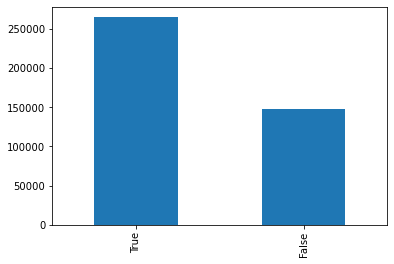

In [83]:
df_tmp["MachineHoursCurrentMeter_is_missing"].value_counts().plot(kind="bar")

In [84]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [86]:
pd.Categorical(df_tmp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [87]:
# Turn Categorical variable into numbers and fill missing
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Make columns for missing and convert variable into numbers
        #Most important as we convert out data into categories 
        #we can make fill up null by -1 and thus when converting into
        #numbers we can turn into 0 by adding 1 and adding columns which 
        #says that we are missing columns.
        df_tmp[label+"_is_missin"]=pd.isnull(content)
        df_tmp[label]=pd.Categorical(content).codes+1

In [88]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missin
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [89]:
df_tmp.head().T

,205615,233186,142491,115536,92301
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500,30000,21000,33000,24000
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missin,False,True,False,True,True
Blade_Type_is_missin,False,True,False,True,True
Travel_Controls_is_missin,False,True,False,True,True
Differential_Type_is_missin,True,True,True,False,True


Now all our data into numeric and there no Null value in our data. So start fitting our data


In [91]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1)

# Fit the model
model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

Wall time: 7min 4s


RandomForestRegressor(n_jobs=-1)

<AxesSubplot:>

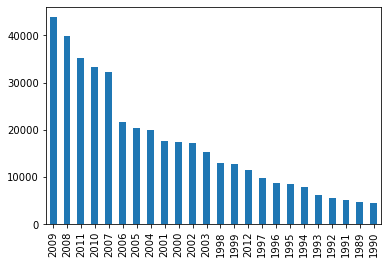

In [92]:
### Spliting data into train/validation sets

df_tmp["saleyear"].value_counts().plot(kind="bar")

In [93]:
df_tmp["saleyear"].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleyear, dtype: int64

In [94]:
#split data into training and validation
df_val=df_tmp[df_tmp.saleyear==2012]
df_train=df_tmp[df_tmp["saleyear"]!=2012]

len(df_val),len(df_train),len(df_tmp)

(11573, 401125, 412698)

In [95]:
401125+11573==412698

True

In [96]:
# Split into X and y
X_train,y_train=df_train.drop("SalePrice",axis=1), df_train["SalePrice"]
X_valid,y_valid=df_val.drop("SalePrice",axis=1), df_val["SalePrice"]

In [100]:
X_train.shape,X_valid.shape,y_train.shape,y_valid.shape

((401125, 102), (11573, 102), (401125,), (11573,))

### Building an evaluation function


In [110]:
#Create evaluation function(the competiton using RMSLE)
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_test, y_preds):
    """Calculate root mean squared log error between predictions and true labels"""
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# Create function to evaluation model on a few different level

def show_score(model):
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_valid)
    scores={"Trainig MAE ": mean_absolute_error(y_train,train_preds),
            "Valid MAE" : mean_absolute_error(y_valid,val_preds),
            "Training RMSLE": rmsle(y_train,train_preds),
            "Valid RMSLE": rmsle(y_valid,val_preds),
            "Training R^2": r2_score(y_train,train_preds),
            "Valid R^2": r2_score(y_valid,val_preds)
    }
    return scores


## Testing our model on a subset(to tune the hyperparameters)


In [104]:
# ## This take too much type
# # Instantiate model
# model = RandomForestRegressor(n_jobs=-1)

# # Fit the model
# model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

In [105]:
X_train.shape[0]

401125

In [107]:
# change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)

In [108]:
model.fit(X_train,y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [111]:
show_score(model)

{'Trainig MAE ': 5548.995840324089,
 'Valid MAE': 7179.6961392897265,
 'Training RMSLE': 0.25737726780537257,
 'Valid RMSLE': 0.29404344200903443,
 'Training R^2': 0.8610738743845616,
 'Valid R^2': 0.8320179198265638}

### Hyperparameter tuning with RandomizedSearchTV

In [112]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameter

rf_grid={"n_estimators": np.arange(10,100,10),
         "max_depth": [None, 3,5, 10],
         "min_samples_split": np.arange(2,20,2),
         "min_samples_leaf": np.arange(1,20,2),
         "max_features": [0.5, 1, "sqrt","auto"],
         "max_samples": [10000]
        }

#Instantiate RandomizedSearchCV model
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                           param_distributions=rf_grid,
                           n_iter=5,
                           cv=5,
                           verbose=True
                           )
# Fit the model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.2min finished


Wall time: 2min 15s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [113]:
# Find the best hyperparameters
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 10}

In [114]:
show_score(rs_model)

{'Trainig MAE ': 8924.174788836703,
 'Valid MAE': 10366.248769435346,
 'Training RMSLE': 0.3918020252579644,
 'Valid RMSLE': 0.4139164779850061,
 'Training R^2': 0.6847949148011374,
 'Valid R^2': 0.6920175179918956}

## Train model with best parameters

**NOTE:** These we found after 100 iterations of RandomizedSearchCV

In [116]:
%%time

#Most Ideal hyperparameters
ideal_model=RandomForestRegressor(n_estimators=40,
                                  min_samples_leaf=1,
                                  min_samples_split=14,
                                  max_features=0.5,
                                  n_jobs=-1,
                                  max_samples=None
                                 )

# Fit the ideal model
ideal_model.fit(X_train, y_train)

Wall time: 1min 11s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [118]:
show_score(ideal_model)

{'Trainig MAE ': 2957.2066933498104,
 'Valid MAE': 5957.751367278929,
 'Training RMSLE': 0.14468181022473986,
 'Valid RMSLE': 0.24681838728576147,
 'Training R^2': 0.9588396691261354,
 'Valid R^2': 0.8821857773539022}

In [119]:
show_score(rs_model)

{'Trainig MAE ': 8924.174788836703,
 'Valid MAE': 10366.248769435346,
 'Training RMSLE': 0.39180202525796437,
 'Valid RMSLE': 0.4139164779850061,
 'Training R^2': 0.6847949148011374,
 'Valid R^2': 0.6920175179918955}

## Make a prediction on test data

In [140]:
#import the test data
df_test = pd.read_csv("data/Test.csv",low_memory=False,parse_dates=['saledate'])

In [141]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Preprocessing the data(getting the test dataset in the same format as our training data)

In [142]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleyear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofweek"] = df.saledate.dt.dayofweek
    df["saleDayofyear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missin"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df



In [143]:
#process the test data
df_test=preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missin,Stick_Length_is_missin,Thumb_is_missin,Pattern_Changer_is_missin,Grouser_Type_is_missin,Backhoe_Mounting_is_missin,Blade_Type_is_missin,Travel_Controls_is_missin,Differential_Type_is_missin,Steering_Controls_is_missin
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [144]:
set(X_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [145]:
df_tmp.head().T

,205615,233186,142491,115536,92301
SalesID,1646770,1728883,1508502,1452578,1403418
SalePrice,9500,30000,21000,33000,24000
MachineID,1126363,1523610,1153157,1544443,1390168
ModelID,8434,9105,4138,3854,7110
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missin,False,True,False,True,True
Blade_Type_is_missin,False,True,False,True,True
Travel_Controls_is_missin,False,True,False,True,True
Differential_Type_is_missin,True,True,True,False,True


In [146]:
df_tmp["saleyear"]

205615    1989
233186    1989
142491    1989
115536    1989
92301     1989
          ... 
409901    2012
405777    2012
411889    2012
411890    2012
409203    2012
Name: saleyear, Length: 412698, dtype: int64

In [147]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missin,Stick_Length_is_missin,Thumb_is_missin,Pattern_Changer_is_missin,Grouser_Type_is_missin,Backhoe_Mounting_is_missin,Blade_Type_is_missin,Travel_Controls_is_missin,Differential_Type_is_missin,Steering_Controls_is_missin
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
233186,1728883,1523610,9105,132,99.0,1986,0.0,0,4772,1852,...,True,True,True,True,True,True,True,True,True,True
142491,1508502,1153157,4138,132,99.0,1972,0.0,0,2347,713,...,True,True,True,True,True,False,False,False,True,True
115536,1452578,1544443,3854,132,99.0,1974,0.0,0,1767,535,...,True,True,True,True,True,True,True,True,False,False
92301,1403418,1390168,7110,132,99.0,1986,0.0,0,744,245,...,True,True,True,True,True,True,True,True,True,True


In [148]:
set(X_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [149]:
# Manually adjust df_test to have auctioneerID_is missing column
df_test["auctioneerID_is_missing"]=False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missin,Thumb_is_missin,Pattern_Changer_is_missin,Grouser_Type_is_missin,Backhoe_Mounting_is_missin,Blade_Type_is_missin,Travel_Controls_is_missin,Differential_Type_is_missin,Steering_Controls_is_missin,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [150]:
# Make predicions on the test data
test_preds = ideal_model.predict(df_test)

In [151]:
test_preds

array([19247.8622757 , 17029.7037717 , 53013.49980812, ...,
       14245.66588773, 20069.22946834, 29479.2829786 ])

In [152]:
# Format predictions into the same format kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,19247.862276
1,1227844,17029.703772
2,1227847,53013.499808
3,1227848,63646.981271
4,1227863,47211.249275
...,...,...
12452,6643171,40034.556493
12453,6643173,15508.346778
12454,6643184,14245.665888
12455,6643186,20069.229468


In [153]:
# Export prediction data
df_preds.to_csv("data/test_predictions.csv")

### Features Importance

Features importance seeks to figure out which different attributes of the data were most importance when it's comes to predicting the **target variable** (SalePrice)

In [154]:
# Find feature importance of our best model
len(ideal_model.feature_importances_)

102

In [164]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({
        "features":columns,
        "feature_importances": importances
    }).sort_values("feature_importances", ascending=False).reset_index(drop=True))
    
    #Plot the dataframe
    fig,ax=plt.subplots()
    ax.barh(df["features"][:n],df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()
    

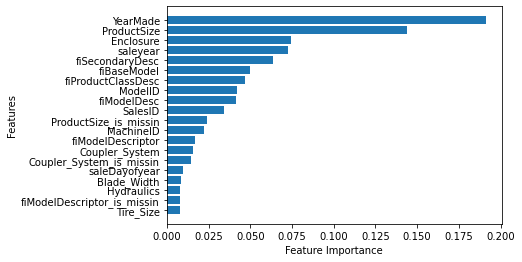

In [165]:
plot_features(X_train.columns, ideal_model.feature_importances_)

### Research feature engineering tell us the model is working fine or not as we can intuitively tell us which features are more important than others.  

`Question to Finish:` Why might knowing the feature importances of a trained machine learning model be helpful?

**Final challenge:** what other machine learning models could you try on our dataset?

    
**Hint:** `1.XG Boost`  `2.Cat Boost`   
    